# Использование нейронной сети для распознавания моделей одежды в Keras


Keras — открытая нейросетевая библиотека, написанная на языке Python. Она представляет собой надстройку над фреймворками TensorFlow + Theano и нацелена на оперативную работу с сетями глубокого обучения.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Подготовка данных для обучения сети

**Загружаем набор данных**

In [2]:
# В Keras встроены средства работы с популярными наборами данных
# (x_train, y_train) - набор данных для обучения
# (x_test, y_test) - набор данных для тестирования
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Список с названиями классов

In [3]:
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Просматриваем примеры изображений

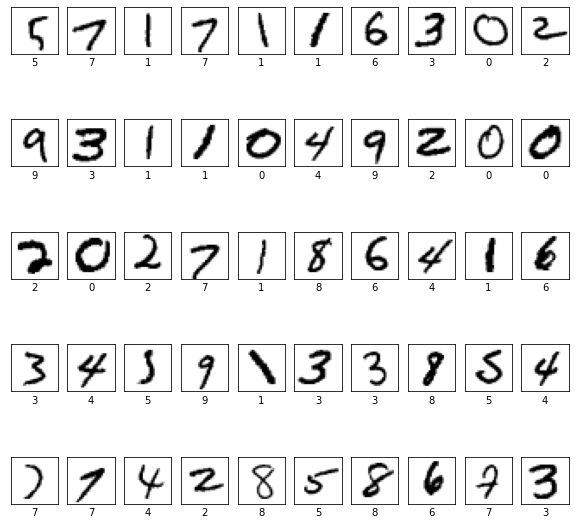

In [4]:
plt.figure(figsize=(10, 10))
for i in range(100, 150):
    plt.subplot(5, 10, i - 100 + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

**Преобразование размерности данных в наборе**

In [5]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

**Нормализация данных**

In [6]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train / 255
x_test = x_test / 255

**Работа с правильными ответами**

In [7]:
n = 0

In [8]:
print(y_train[n])

5


**Преобразуем метки в формат one hot encoding**

In [9]:
y_train = utils.to_categorical(y_train, 10)

In [10]:
y_test = utils.to_categorical(y_test, 10)

**Правильный ответ в формате one hot encoding**

In [11]:
print(y_train[n])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Создаем нейронную сеть

**Создаем последовательную модель**

In [12]:
# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

**Компилируем сеть**

In [13]:
# 'categorical_crossentropy' - функция штрафа, кроссэнтропия, которую следует использовать для задач классификации, как у нас, 
#metrics=['accuracy'] значит, что мы будем вычислять в модели не только функцию штрафа, но и точность работы, то есть, число правильно классифицированных примеров.
#optimizer="SGD" Стохастический градиентный спуск (англ. Stochastic gradient descent, SGD)
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


## Обучаем нейронную сеть

Это самая ресурсоемкая операция. Мы выполняем обучение "пачками" (mini-batch) по batch_size=200 примеров. При этом, осуществляет epochs=100 проходов по всем входным примерам.

Другие варианты режима обучения:

1) по одному примеру - медленная сходимость, и алгоритм "не видит" хороших минимумов,

2) по всем примерам сразу - трудоемко, часто сходимость к локальному минимуму и склонность к переобучению.

А обработка mini-batch - промежуточный вариант, который называется градиентным стохастическим спуском

In [14]:
with tf.device("gpu:0"):
    print("tf.keras code in this scope will run on GPU")
    model.fit(x_train, y_train,
              batch_size=200,
              epochs=100,
              validation_split=0.2,  # Доля валидационной выборки для контроля переобучения
              verbose=1)  #verbose=0 ничего не покажет, verbose=1 покажет анимированный индикатор выполнения (progress_bar), verbose=2 будет просто указать номер эпохи

tf.keras code in this scope will run on GPU
Epoch 1/100
240/240 [==============================] - 2s 9ms/step - loss: 1.7950 - accuracy: 0.5395 - val_loss: 0.8629 - val_accuracy: 0.8448
Epoch 2/100
240/240 [==============================] - 1s 6ms/step - loss: 0.8006 - accuracy: 0.8386 - val_loss: 0.5758 - val_accuracy: 0.8740
Epoch 3/100
240/240 [==============================] - 1s 6ms/step - loss: 0.5771 - accuracy: 0.8674 - val_loss: 0.4729 - val_accuracy: 0.8867
Epoch 4/100
240/240 [==============================] - 2s 7ms/step - loss: 0.4909 - accuracy: 0.8796 - val_loss: 0.4190 - val_accuracy: 0.8957
Epoch 5/100
240/240 [==============================] - 1s 6ms/step - loss: 0.4415 - accuracy: 0.8877 - val_loss: 0.3863 - val_accuracy: 0.9000
Epoch 6/100
240/240 [==============================] - 2s 7ms/step - loss: 0.4036 - accuracy: 0.8937 - val_loss: 0.3632 - val_accuracy: 0.9046
Epoch 7/100
240/240 [==============================] - 1s 6ms/step - loss: 0.3828 - accuracy: 0.89

240/240 [==============================] - 1s 6ms/step - loss: 0.1678 - accuracy: 0.9545 - val_loss: 0.1731 - val_accuracy: 0.9530
Epoch 58/100
240/240 [==============================] - 1s 6ms/step - loss: 0.1665 - accuracy: 0.9532 - val_loss: 0.1719 - val_accuracy: 0.9529
Epoch 59/100
240/240 [==============================] - 1s 6ms/step - loss: 0.1673 - accuracy: 0.9536 - val_loss: 0.1704 - val_accuracy: 0.9540
Epoch 60/100
240/240 [==============================] - 1s 6ms/step - loss: 0.1657 - accuracy: 0.9536 - val_loss: 0.1694 - val_accuracy: 0.9548
Epoch 61/100
240/240 [==============================] - 1s 6ms/step - loss: 0.1627 - accuracy: 0.9542 - val_loss: 0.1678 - val_accuracy: 0.9549
Epoch 62/100
240/240 [==============================] - 1s 6ms/step - loss: 0.1605 - accuracy: 0.9570 - val_loss: 0.1667 - val_accuracy: 0.9548
Epoch 63/100
240/240 [==============================] - 1s 6ms/step - loss: 0.1603 - accuracy: 0.9555 - val_loss: 0.1656 - val_accuracy: 0.9552
Epoch

## Сохраняем нейронную сеть для последующего использования

In [15]:
model.save('mnist_dense.h5')

## Оценка качества обучения

Проверка качества работы на наборе данных для тестирования

In [16]:
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 1ms/step - loss: 0.1293 - accuracy: 0.9637


In [17]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 96.37


## Используем сеть для распознавания предметов одежды

In [18]:
n_rec = 96

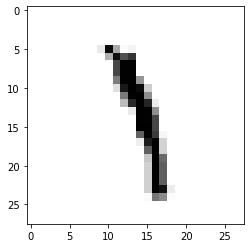

In [19]:
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

**Меняем размерность изображения и нормализуем его**

In [20]:
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [21]:
prediction = model.predict(x)

**Печатаем результаты распознавания**

In [22]:
prediction

array([[1.3539587e-05, 9.0381634e-01, 8.5613516e-04, 3.1288192e-02,
        3.8600629e-03, 7.0906482e-03, 2.1759165e-04, 1.2994168e-02,
        1.6249442e-02, 2.3613783e-02]], dtype=float32)

**Преобразуем результаты из формата one hot encoding**

In [23]:
prediction = np.argmax(prediction[0])
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

Номер класса: 1
Название класса: 1


**Печатаем правильный ответ**

In [24]:
label = np.argmax(y_test[n_rec])
print("Номер класса:", label)
print("Название класса:", classes[label])

Номер класса: 1
Название класса: 1


## Загружаем свою картинку

Загружаем картинку из файла

In [25]:
img_path_all = ['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']
img_path = '1.jpg'
images = []
results_pred = []

Показываем картинку

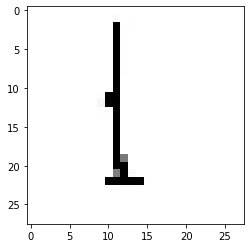

In [26]:
img = image.load_img(img_path, target_size=(28, 28), color_mode="grayscale")
plt.imshow(img.convert('RGBA'))
plt.show()
images.append(img)

Преобразуем картинку для обработки нейронной сетью

In [27]:
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255

Запускаем распознавание

In [28]:
prediction = model.predict(x)

Результаты распознавания

In [29]:
prediction

array([[0.16680385, 0.00342059, 0.05163757, 0.00285189, 0.04536793,
        0.230975  , 0.4345913 , 0.00530205, 0.05351205, 0.00553778]],
      dtype=float32)

In [30]:
prediction = np.argmax(prediction)
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

Номер класса: 6
Название класса: 6


In [31]:
arr_vn = [400, 600, 800, 1200]
arr_ep = [10, 15, 20, 25, 30]
arr_bs = [10, 50, 100, 200, 500]
m_vn = m_ep = m_bs = m_s = 0
for vn in arr_vn:
    # Создаем последовательную модель
    model = Sequential()
    # Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
    model.add(Dense(vn, input_dim=784, activation="relu"))
    # Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
    model.add(Dense(10, activation="softmax"))
    # 'categorical_crossentropy' - функция штрафа, кроссэнтропия, которую следует использовать для задач классификации, как у нас,
    #metrics=['accuracy'] значит, что мы будем вычислять в модели не только функцию штрафа, но и точность работы, то есть, число правильно классифицированных примеров.
    #optimizer="SGD" Стохастический градиентный спуск (англ. Stochastic gradient descent, SGD)
    model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
    for ep in arr_ep:
        for bs in arr_bs:
            with tf.device("gpu:0"):
                print("tf.keras code in this scope will run on GPU")
                model.fit(x_train, y_train,
                          batch_size=bs,
                          epochs=ep,
                          validation_split=0.2,  # Доля валидационной выборки для контроля переобучения
                          verbose=2)  #verbose=0 ничего не покажет, verbose=1 покажет анимированный индикатор выполнения (progress_bar), verbose=2 будет просто указать номер эпохи
            scores = model.evaluate(x_test, y_test, verbose=1)
            if (scores[1] > m_s):
                m_s = scores[1]
                m_ep = ep
                m_vn = vn
                m_bs = bs
                m_m = model




tf.keras code in this scope will run on GPU
Epoch 1/10
4800/4800 - 7s - loss: 0.4479 - accuracy: 0.8803 - val_loss: 0.2715 - val_accuracy: 0.9242
Epoch 2/10
4800/4800 - 7s - loss: 0.2474 - accuracy: 0.9307 - val_loss: 0.2054 - val_accuracy: 0.9442
Epoch 3/10
4800/4800 - 6s - loss: 0.1950 - accuracy: 0.9445 - val_loss: 0.1756 - val_accuracy: 0.9521
Epoch 4/10
4800/4800 - 6s - loss: 0.1612 - accuracy: 0.9548 - val_loss: 0.1544 - val_accuracy: 0.9575
Epoch 5/10
4800/4800 - 6s - loss: 0.1380 - accuracy: 0.9611 - val_loss: 0.1360 - val_accuracy: 0.9627
Epoch 6/10
4800/4800 - 6s - loss: 0.1204 - accuracy: 0.9670 - val_loss: 0.1252 - val_accuracy: 0.9659
Epoch 7/10
4800/4800 - 7s - loss: 0.1064 - accuracy: 0.9702 - val_loss: 0.1167 - val_accuracy: 0.9681
Epoch 8/10
4800/4800 - 7s - loss: 0.0955 - accuracy: 0.9741 - val_loss: 0.1083 - val_accuracy: 0.9708
Epoch 9/10
4800/4800 - 7s - loss: 0.0860 - accuracy: 0.9763 - val_loss: 0.1045 - val_accuracy: 0.9709
Epoch 10/10
4800/4800 - 6s - loss: 0.0

KeyboardInterrupt: 

In [32]:
tf.config.list_physical_devices('GPU')

[]

## Идеи по изменению архитектуры нейронной сети

1. Попробуйте использовать разное количество нейронов на входном слое: 400, 600, 800, 1200.
2. Добавьте в нейронную сеть скрытый слой с разным количеством нейронов: 200, 300, 400, 600, 800.
3. Добавьте несколько скрытых слоев в сеть с разным количеством нейронов в каждом слое.
3. Используйте разное количество эпох: 10, 15, 20, 25, 30.
4. Используйте разные размеры мини-выборки (batch_size): 10, 50, 100, 200, 500.
 

Подберите разные комбинации гиперпараметров таким образом, чтобы получить лучший результат на тестовом наборе данных.

# Как выбрать функцию активации?


Наименования функция активации можно взять здесь https://keras.io/api/layers/activations/. Настало время решить, какую из функций активации использовать. Следует ли для каждого случая использовать ReLu? Или сигмоиду (sigmoid)? Или гиперболический тангенс (tanh)? На эти вопросы нельзя дать однозначного ответа. Когда вы знаете некоторые характеристики функции, которую пытаетесь аппроксимировать, выбирайте активационную функцию, которая аппроксимирует искомую функцию лучше и ведет к более быстрому обучению.

Если вы не знаете природу исследуемой функции, в таком случае начните с ReLu и потом работайте в обратном направлении. В большинстве случаев ReLu работает как хороший аппроксиматор.